In [1]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190292 sha256=2633dc852da400123b385ec908953b68c938ea2d9efdee7f22ce9347389d3c96
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from sklearn.datasets import make_blobs

In [6]:
# Generate sample data
np.random.seed(42)
X = np.random.randn(100, 1)
X[-15:] += np.random.uniform(10, 20, size=(15, 1))  # Add anomalies


In [7]:
# Train the KNN model
clf = KNN()
clf.fit(X)

# Get the prediction scores and labels
y_train_scores = clf.decision_scores_
y_train_pred = clf.labels_


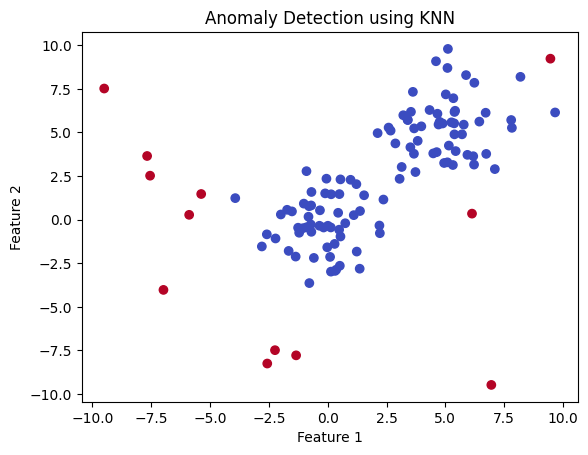

In [5]:
# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_train_pred, cmap='coolwarm')
plt.title("Anomaly Detection using KNN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


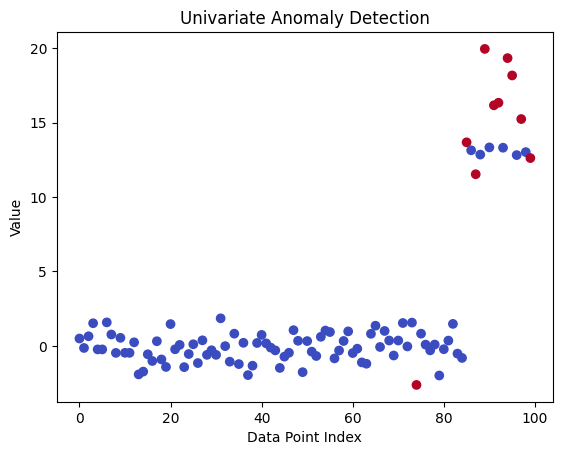

In [8]:
# Plot
plt.scatter(np.arange(len(X)), X, c=y_train_pred, cmap='coolwarm')
plt.title("Univariate Anomaly Detection")
plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.show()


Synthetic Time Series Data

In [9]:
np.random.seed(42)

# Generate a sine wave
t = np.linspace(0, 100, 200)
X = np.sin(t) + np.random.normal(scale=0.1, size=t.shape)

# Introduce anomalies
X[::20] += np.random.uniform(2, 5, size=(10,))

X = X.reshape(-1, 1)  # Reshape for PyOD


In [10]:
# Initialize and fit the model
clf = KNN()
clf.fit(X)

# Get the prediction labels and scores
y_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)


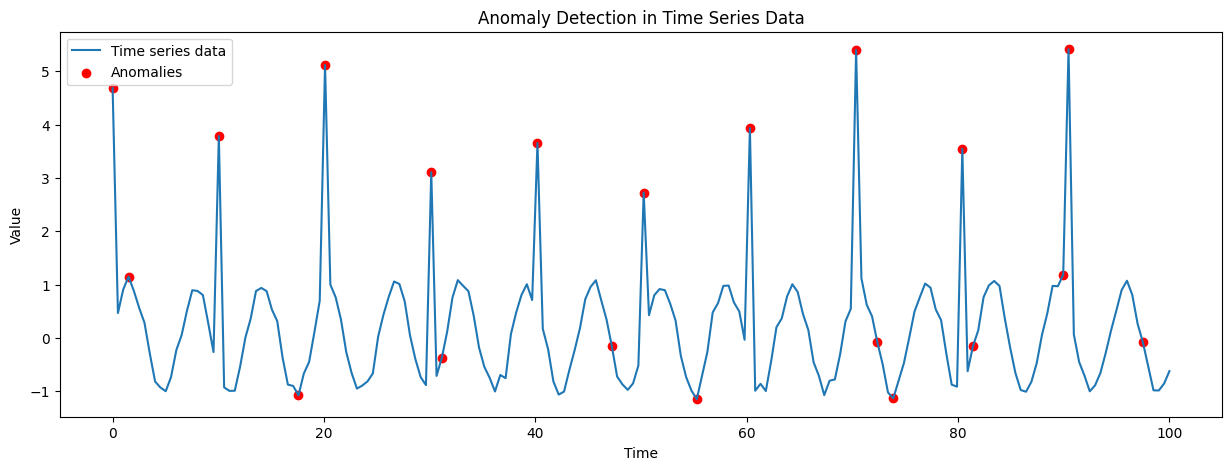

In [11]:
# Plot
plt.figure(figsize=(15, 5))
plt.plot(t, X, label='Time series data')
plt.scatter(t[y_pred == 1], X[y_pred == 1], color='r', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Anomaly Detection in Time Series Data')
plt.legend()
plt.show()
